HW3

Shiyu Chen

Github: https://github.com/13RENDA/EE399-HW3.git

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Load the MNIST data
mnist = fetch_openml('mnist_784')

# Scale the data to [0, 1]
X = mnist.data / 255.0

# Convert feature values from string to integer
X = mnist.data.astype('int')
Y = mnist.target.astype('int')

# Reshape images into column vectors
X = X.T


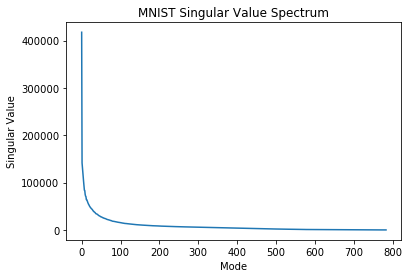

Rank of the digit space: 102


In [15]:
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Perform SVD on the data
U, s, Vt = svd(X, full_matrices = False)
V = Vt.T

# Plot the singular value spectrum
plt.plot(s)
plt.xlabel('Mode')
plt.ylabel('Singular Value')
plt.title('MNIST Singular Value Spectrum')
plt.show()

# Determine the number of modes necessary for good image reconstruction
energy = np.cumsum(s ** 2) / np.sum(s ** 2)
r = np.argmax(energy > 0.95) + 1
print(f"Rank of the digit space: {r}")

U matrix shape: (784, 784)
Sigma matrix shape: (784,)
V matrix shape: (70000, 784)


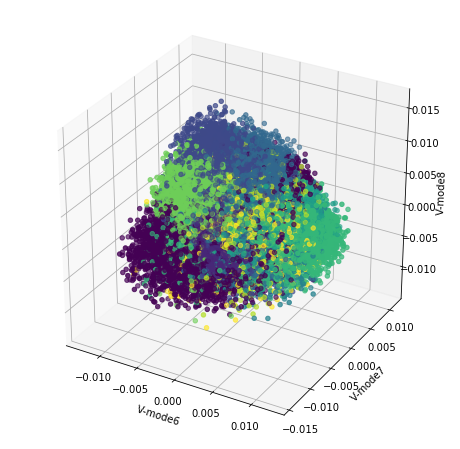

In [16]:
# Interpretation of U, Sigma, and V matrices
print('U matrix shape:', U.shape)
print('Sigma matrix shape:', s.shape)
print('V matrix shape:', V.shape)

# Create the 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(V[:, 5], V[:, 6], V[:, 7], c=mnist.target.astype(int), s=20)

# Set the labels and limits of the plot
ax.set_xlabel('V-mode6')
ax.set_ylabel('V-mode7')
ax.set_zlabel('V-mode8')

plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Linear classifier for two digits
x_lc = mnist.data[(Y == 4) | (Y == 9)]
y_lc = Y[(Y == 4) | (Y == 9)]

# PCA
pca = PCA(n_components=3)
x_lc_pca = pca.fit_transform(x_lc)
x_lc_pca = x_lc_pca.astype('float64')
y_lc = y_lc.astype('float64')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_lc_pca, y_lc, test_size=0.2)

# train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
print(f'LDA accuracy for 4 vs 9: {accuracy_score(y_test, y_pred)}')


LDA accuracy for 4 vs 9: 0.6619513964454117


In [11]:
# Linear classifier for three digits
x_lc2 = mnist.data[(Y == 1) | (Y == 3)| (Y == 5)]
y_lc2 = Y[(Y == 1) | (Y == 3)| (Y == 5)]

# PCA
pca = PCA(n_components=3)
x_lc2_pca = pca.fit_transform(x_lc)
x_lc2_pca = x_lc_pca.astype('float64')
y_lc2 = y_lc.astype('float64')

# Split into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_lc2_pca, y_lc2, test_size=0.2)

# train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train2, y_train2)
y_pred2 = lda.predict(X_test2)
print(f'LDA accuracy for 1 vs 3 vs 5: {accuracy_score(y_test2, y_pred2)}')


LDA accuracy for 1 vs 3 vs 5: 0.651070003627131


In [22]:
# Declear variables
max_accuracy = 0
min_accuracy = 1
max_num = (0,0)
min_num = (0,0)

# Iterate through all combinations of data
for i in range(9):
    for k in range(i+1, 10):

        x_lc = mnist.data[(Y == i) | (Y == k)]
        y_lc = mnist.target[(Y == i) | (Y == k)]

        # PCA
        pca = PCA(n_components=3)
        x_pca = pca.fit_transform(x_lc)
        x_pca = x_pca.astype('float64')
        y_lc = y_lc.astype('float64')
        
        # Split into train and test sets
        X_tr, X_te, y_tr, y_te = train_test_split(x_pca, y_lc, test_size=0.2)

        # train LDA classifier
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_tr, y_tr)
        y_pred = lda.predict(X_te)
        accuracy = accuracy_score(y_te, y_pred)

        # Compute maximum accuracy of LDA
        if(accuracy > max_accuracy and accuracy != 1.0):
            max_accuracy = accuracy
            # Compute the combination of maximum accuracy
            max_num = (i,k)
        # Compute minimum accuracy of LDA
        if(accuracy < min_accuracy and accuracy != 0.0):
            min_accuracy = accuracy
            # Compute the combination of minimum accuracy
            min_num = (i,k)
print(f"LDA has maximum accuracy: {max_accuracy} when processing numbers {max_num}\n", 
      f"LDA has minimum accuracy: {min_accuracy} when processing numbers {min_num}\n")

LDA has maximum accuracy: 0.9922192151556157 when processing numbers (0, 1)
 LDA has minimum accuracy: 0.6779107725788901 when processing numbers (4, 9)



In [25]:
# Linear classifier for easiest digits
x_01 = mnist.data[(Y == 0) | (Y == 1)]
y_01 = Y[(Y == 0) | (Y == 1)]

# PCA
pca = PCA(n_components=3)
x_01_pca = pca.fit_transform(x_01)
x_01_pca = x_01_pca.astype('float64')

# Split into train and test sets
X_train01, X_test01, y_train01, y_test01 = train_test_split(x_01_pca, y_01, test_size=0.2)

# Scaling the data from -1 to 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train01)
X_train01 = scaling.transform(X_train01)
X_test01 = scaling.transform(X_test01)

# train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train01, y_train01)
y_lda_pred01 = lda.predict(X_test01)
print(f'LDA accuracy for 0 vs 1: {accuracy_score(y_test01, y_lda_pred01)}')

# train SVM classifier
svc = SVC(kernel='linear')
svc.fit(X_train01, y_train01)
y_svc_pred01 = svc.predict(X_test01)
print(f'SVM accuracy for 0 vs 1: {accuracy_score(y_test01, y_svc_pred01)}')

# train decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train01, y_train01)
y_dtc_pred01 = dtc.predict(X_test01)
print(f'Decision tree accuracy for 0 vs 1: {accuracy_score(y_test01, y_dtc_pred01)}')


LDA accuracy for 0 vs 1: 0.9871447902571042
SVM accuracy for 0 vs 1: 0.9945872801082544
Decision tree accuracy for 0 vs 1: 0.9959404600811907


In [24]:
# Linear classifier for hardest digits
x_49 = mnist.data[(Y == 4) | (Y == 9)]
y_49 = Y[(Y == 4) | (Y == 9)]

# PCA
pca = PCA(n_components=3)
x_49_pca = pca.fit_transform(x_49)
x_49_pca = x_49_pca.astype('float64')
y_49 = y_49.astype('float64')

# Split into train and test sets
X_train49, X_test49, y_train49, y_test49 = train_test_split(x_49_pca, y_49, test_size=0.2, random_state=42)

# Scaling the data from -1 to 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train49)
X_train49 = scaling.transform(X_train49)
X_test49 = scaling.transform(X_test49)

# train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train49, y_train49)
y_pred49 = lda.predict(X_test49)
print(f'LDA accuracy for 0 vs 1: {accuracy_score(y_test49, y_pred49)}')

# train SVM classifier
svc = SVC(kernel='linear')
svc.fit(X_train49, y_train49)
y_pred49 = svc.predict(X_test49)
print(f'SVM accuracy for 0 vs 1: {accuracy_score(y_test49, y_pred49)}')

# train decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(f'Decision tree accuracy for 0 vs 1: {accuracy_score(y_test, y_pred)}')


LDA accuracy for 0 vs 1: 0.6543344214726151
SVM accuracy for 0 vs 1: 0.6561479869423286
Decision tree accuracy for 0 vs 1: 0.6383750453391367


In [26]:
# Iterate through all combinations of data set
for i in range(0,9):
    for k in range(i+1,10):
        
        x = mnist.data[(Y == i) | (Y == k)]
        y = mnist.target[(Y == i) | (Y == k)]

        # PCA
        pca = PCA(n_components=3)
        x_pca = pca.fit_transform(x)
        x_pca = x_pca.astype('float64')
        X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=42)

        # Normalize the data set
        scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_tr)
        X_tr = scaling.transform(X_tr)
        X_te = scaling.transform(X_te)

        # train LDA classifier
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_tr, y_tr)
        y_pred = lda.predict(X_te)
        print(f'LDA accuracy for {i} vs {k}: {accuracy_score(y_te, y_pred)}')

        # train SVM classifier
        svc = SVC(kernel='linear')
        svc.fit(X_tr, y_tr)
        y_pred = svc.predict(X_te)
        print(f'SVM accuracy for {i} vs {k}: {accuracy_score(y_te, y_pred)}')

        # train decision tree classifier
        dtc = DecisionTreeClassifier()
        dtc.fit(X_tr, y_tr)
        y_pred = dtc.predict(X_te)
        print(f'Decision tree accuracy for {i} vs {k}: {accuracy_score(y_te, y_pred)}')

/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 1: 0.9952638700947226
SVM accuracy for 0 vs 1: 0.9996617050067659
Decision tree accuracy for 0 vs 1: 0.9983085250338295


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 2: 0.9863260165527168
SVM accuracy for 0 vs 2: 0.9848866498740554
Decision tree accuracy for 0 vs 2: 0.9780496581504138


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 3: 0.988252046991812
SVM accuracy for 0 vs 3: 0.9903880384478462
Decision tree accuracy for 0 vs 3: 0.9878960484158064


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 4: 0.9938091769847051
SVM accuracy for 0 vs 4: 0.9934450109249818
Decision tree accuracy for 0 vs 4: 0.9894391842680262


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 5: 0.9848714069591528
SVM accuracy for 0 vs 5: 0.9822239031770046
Decision tree accuracy for 0 vs 5: 0.9867624810892587


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 6: 0.9862119013062409
SVM accuracy for 0 vs 6: 0.9862119013062409
Decision tree accuracy for 0 vs 6: 0.9804063860667634


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 7: 0.9940140845070422
SVM accuracy for 0 vs 7: 0.995774647887324
Decision tree accuracy for 0 vs 7: 0.9901408450704225


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 8: 0.9868900218499636
SVM accuracy for 0 vs 8: 0.9879825200291333
Decision tree accuracy for 0 vs 8: 0.9810633648943918


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 0 vs 9: 0.9873782906599351
SVM accuracy for 0 vs 9: 0.9902632527948071
Decision tree accuracy for 0 vs 9: 0.9841327082582041


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 2: 0.9815063887020847
SVM accuracy for 1 vs 2: 0.9852051109616677
Decision tree accuracy for 1 vs 2: 0.9815063887020847


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 3: 0.9816910785619174
SVM accuracy for 1 vs 3: 0.9830226364846871
Decision tree accuracy for 1 vs 3: 0.9803595206391478


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 4: 0.9942196531791907
SVM accuracy for 1 vs 4: 0.9942196531791907
Decision tree accuracy for 1 vs 4: 0.9904794287657259


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 5: 0.9880197322057788
SVM accuracy for 1 vs 5: 0.9943622269203665
Decision tree accuracy for 1 vs 5: 0.98907681465821


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 6: 0.9908505591324974
SVM accuracy for 1 vs 6: 0.9983056590986107
Decision tree accuracy for 1 vs 6: 0.991867163673331


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 7: 0.9897824653922215
SVM accuracy for 1 vs 7: 0.994067237969677
Decision tree accuracy for 1 vs 7: 0.988134475939354


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 8: 0.9622577354641279
SVM accuracy for 1 vs 8: 0.9829989799387964
Decision tree accuracy for 1 vs 8: 0.9734784087045223


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 1 vs 9: 0.9925851027974385
SVM accuracy for 1 vs 9: 0.9912369396697001
Decision tree accuracy for 1 vs 9: 0.9865183687226154


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 3: 0.9678103997170145
SVM accuracy for 2 vs 3: 0.9646268128758401
Decision tree accuracy for 2 vs 3: 0.9579059073222498


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 4: 0.9790083242851972
SVM accuracy for 2 vs 4: 0.9761129207383279
Decision tree accuracy for 2 vs 4: 0.9750271444082519


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 5: 0.971815107102593
SVM accuracy for 2 vs 5: 0.9748214956783164
Decision tree accuracy for 2 vs 5: 0.9684329199549042


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 6: 0.982335976928623
SVM accuracy for 2 vs 6: 0.9805335255948089
Decision tree accuracy for 2 vs 6: 0.9787310742609949


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 7: 0.9835491774588729
SVM accuracy for 2 vs 7: 0.9814490724536227
Decision tree accuracy for 2 vs 7: 0.9796989849492475


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 8: 0.9663409337676439
SVM accuracy for 2 vs 8: 0.9717698154180239
Decision tree accuracy for 2 vs 8: 0.9536735432500905


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 2 vs 9: 0.985663082437276
SVM accuracy for 2 vs 9: 0.9845878136200716
Decision tree accuracy for 2 vs 9: 0.9763440860215054


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 3 vs 4: 0.9910490511994271
SVM accuracy for 3 vs 4: 0.9903329752953813
Decision tree accuracy for 3 vs 4: 0.9781596849266022


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 3 vs 5: 0.9502043849869937
SVM accuracy for 3 vs 5: 0.958379784466741
Decision tree accuracy for 3 vs 5: 0.961352657004831


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 3 vs 6: 0.9900142653352354
SVM accuracy for 3 vs 6: 0.996077032810271
Decision tree accuracy for 3 vs 6: 0.9761055634807418


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 3 vs 7: 0.9826809837201247
SVM accuracy for 3 vs 7: 0.9799099411153447
Decision tree accuracy for 3 vs 7: 0.973328714928992


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 3 vs 8: 0.9652827487473157
SVM accuracy for 3 vs 8: 0.9695776664280601
Decision tree accuracy for 3 vs 8: 0.9634931997136722


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 3 vs 9: 0.9744680851063829
SVM accuracy for 3 vs 9: 0.9769503546099291
Decision tree accuracy for 3 vs 9: 0.9599290780141844


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 4 vs 5: 0.9874429223744292
SVM accuracy for 4 vs 5: 0.9874429223744292
Decision tree accuracy for 4 vs 5: 0.9790715372907154


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 4 vs 6: 0.9901459854014598
SVM accuracy for 4 vs 6: 0.9905109489051095
Decision tree accuracy for 4 vs 6: 0.9799270072992701


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 4 vs 7: 0.9840651558073654
SVM accuracy for 4 vs 7: 0.9893767705382436
Decision tree accuracy for 4 vs 7: 0.9734419263456091


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 4 vs 8: 0.9871794871794872
SVM accuracy for 4 vs 8: 0.9842490842490842
Decision tree accuracy for 4 vs 8: 0.9644688644688645


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 4 vs 9: 0.9586507072905331
SVM accuracy for 4 vs 9: 0.961189698948132
Decision tree accuracy for 4 vs 9: 0.9557490025389916


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 5 vs 6: 0.976497346474602
SVM accuracy for 5 vs 6: 0.9742228961334344
Decision tree accuracy for 5 vs 6: 0.9711902956785443


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 5 vs 7: 0.9897134459955915
SVM accuracy for 5 vs 7: 0.9922850844966936
Decision tree accuracy for 5 vs 7: 0.9812637766348273


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 5 vs 8: 0.9634703196347032
SVM accuracy for 5 vs 8: 0.9668949771689498
Decision tree accuracy for 5 vs 8: 0.9623287671232876


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 5 vs 9: 0.9849340866290018
SVM accuracy for 5 vs 9: 0.9845574387947269
Decision tree accuracy for 5 vs 9: 0.9747645951035782


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 6 vs 7: 0.9961185603387438
SVM accuracy for 6 vs 7: 0.9996471418489767
Decision tree accuracy for 6 vs 7: 0.9915314043754411


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 6 vs 8: 0.9857716161984678
SVM accuracy for 6 vs 8: 0.986866107260124
Decision tree accuracy for 6 vs 8: 0.97117840204305


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 6 vs 9: 0.9949403686302855
SVM accuracy for 6 vs 9: 0.9989157932779184
Decision tree accuracy for 6 vs 9: 0.9924105529454282


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 7 vs 8: 0.9872521246458924
SVM accuracy for 7 vs 8: 0.990084985835694
Decision tree accuracy for 7 vs 8: 0.9762747875354107


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 7 vs 9: 0.9540512101017187
SVM accuracy for 7 vs 9: 0.9603647842862154
Decision tree accuracy for 7 vs 9: 0.9779024903542617


/Users/brenda/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA accuracy for 8 vs 9: 0.9746100834240116
SVM accuracy for 8 vs 9: 0.9742473703300689
Decision tree accuracy for 8 vs 9: 0.9651795429815017
